Манга — это популярная форма японской культуры, представляющая собой графические романы и комиксы. Эти иллюстрированные книги включают разнообразные сюжеты и подходят для читателей всех возрастов. Отличительной чертой манги являются её выразительный визуальный стиль, проработанные персонажи и широкий выбор тематик. Она охватывает такие направления, как экшен, романтика, фантастика, комедия, ужасы и многие другие, позволяя каждому найти что-то по душе.
Благодаря своей универсальности манга находит поклонников во всех уголках планеты. Люди не только читают её, но и обсуждают понравившиеся произведения, создают фанатские обзоры и делятся своими впечатлениями. Однако богатый выбор историй может сбить с толку начинающего читателя. В таких случаях на помощь приходят рекомендации — будь то советы пользователей в интернете или подборки популярных произведений. Современные платформы используют данные о предпочтениях пользователей и рейтингах, чтобы помочь найти новые произведения, идеально подходящие под интересы конкретного человека.

**MAL-manga.csv**

Title: Name of the manga

Rank: Ranking of the manga

Type: Category of manga e.g. One-shot, Light-novel, etc

Volumes: Number of volumes of the manga

Published: Date of publishing of a manga

Members: Number of members who have read the manga

page_url: The URL link to the page of the particular manga

image_url: The URL link to the cover image of the particular manga

Score: Average user rating/score of the manga

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble

Загрузка датасета

In [523]:
dataframe = pd.read_csv('MAL-manga.csv')

In [524]:
dataframe

,Unnamed: 0,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,2,Rain,1808,Manga,?,Nov 2008 -,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90
...,...,...,...,...,...,...,...,...,...,...
17806,17806,Akuyaku Reijou desu ga Kouryaku Taishou no You...,10635,Manga,?,Dec 2020 -,1142,https://myanimelist.net/manga/132451/Akuyaku_R...,https://cdn.myanimelist.net/r/100x140/images/m...,6.85
17807,17807,Hakuji,5720,Manga,2,May 2008 - Apr 2010,6103,https://myanimelist.net/manga/10141/Hakuji,https://cdn.myanimelist.net/r/100x140/images/m...,7.21
17808,17808,Maouritsu Chuu-Boss Yousei Academia,15889,Manga,3,Sep 2017 - Mar 2019,696,https://myanimelist.net/manga/112973/Maouritsu...,https://cdn.myanimelist.net/r/100x140/images/m...,6.38
17809,17809,Arakure Ojousama wa Monmon Shiteiru,7569,Manga,?,Nov 2018 -,11257,https://myanimelist.net/manga/117227/Arakure_O...,https://cdn.myanimelist.net/r/100x140/images/m...,7.07


Подготовка данных

In [525]:
dataframe_columns = ["Rank", "Type", "Volumes", "Published", "Members", "Score"]
dataframe = dataframe.loc[:,dataframe_columns]
dataframe_num = ["Rank", "Members", "Score", "Volumes"]
dataframe_str = [e for e in dataframe_columns if e not in dataframe_num]

dataframe['Volumes'] = dataframe['Volumes'].replace('?', np.nan)
dataframe['Volumes'] = pd.to_numeric(dataframe['Volumes'], errors='coerce')
mean_volumes = dataframe['Volumes'].mean()
dataframe['Volumes'] = dataframe['Volumes'].fillna(mean_volumes)
#dataframe = dataframe.dropna(subset=['Volumes'])

dataframe['Members'] = np.log1p(dataframe['Members'])

dataframe["Start_Year"] = dataframe["Published"].str.extract(r"(\d{4})").astype(float)
dataframe["Start_Year"] = dataframe["Start_Year"].fillna(dataframe["Start_Year"].mean())
current_year = 2024
dataframe['Age'] = current_year - dataframe['Start_Year'] #параметр, показывающий "возраст" манги
dataframe = dataframe.drop(columns=["Published"])
dataframe = dataframe.drop(columns=["Start_Year"])

all_types = dataframe["Type"].unique()
all_types = "Type_" + np.delete(all_types, all_types == "Unknown")

In [526]:
count = 0
for t in dataframe['Type']:
    if t == 'One-shot':
        count += 1
print(count)

1564


Визуализация данных

In [527]:
dataframe

,Rank,Type,Volumes,Members,Score,Age
0,460,Manga,35.000000,9.594990,8.16,39.0
1,4532,Manga,18.000000,9.448570,7.31,11.0
2,1808,Manga,5.066793,9.394494,7.67,16.0
3,17377,One-shot,5.066793,6.918695,5.95,13.0
4,953,Manhwa,5.066793,8.510974,7.90,9.0
...,...,...,...,...,...,...
17806,10635,Manga,5.066793,7.041412,6.85,4.0
17807,5720,Manga,2.000000,8.716700,7.21,16.0
17808,15889,Manga,3.000000,6.546785,6.38,7.0
17809,7569,Manga,5.066793,9.328834,7.07,6.0


In [528]:
dataframe.describe()

,Rank,Volumes,Members,Score,Age
count,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000
mean,8919.628937,5.066793,7.518228,6.989322,14.054690
std,5153.840633,5.781243,1.230540,0.548498,9.102119
min,1.000000,1.000000,5.225747,2.430000,1.000000
25%,4453.500000,2.000000,6.605298,6.640000,8.000000
50%,8929.000000,5.000000,7.306531,6.970000,13.000000
75%,13381.500000,5.066793,8.228043,7.320000,18.000000
max,17847.000000,200.000000,13.365230,9.470000,78.000000


array([[<Axes: xlabel='Rank', ylabel='Rank'>,
        <Axes: xlabel='Volumes', ylabel='Rank'>,
        <Axes: xlabel='Members', ylabel='Rank'>,
        <Axes: xlabel='Score', ylabel='Rank'>,
        <Axes: xlabel='Age', ylabel='Rank'>],
       [<Axes: xlabel='Rank', ylabel='Volumes'>,
        <Axes: xlabel='Volumes', ylabel='Volumes'>,
        <Axes: xlabel='Members', ylabel='Volumes'>,
        <Axes: xlabel='Score', ylabel='Volumes'>,
        <Axes: xlabel='Age', ylabel='Volumes'>],
       [<Axes: xlabel='Rank', ylabel='Members'>,
        <Axes: xlabel='Volumes', ylabel='Members'>,
        <Axes: xlabel='Members', ylabel='Members'>,
        <Axes: xlabel='Score', ylabel='Members'>,
        <Axes: xlabel='Age', ylabel='Members'>],
       [<Axes: xlabel='Rank', ylabel='Score'>,
        <Axes: xlabel='Volumes', ylabel='Score'>,
        <Axes: xlabel='Members', ylabel='Score'>,
        <Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='Age', ylabel='Score'>],
       [<Axes: xl

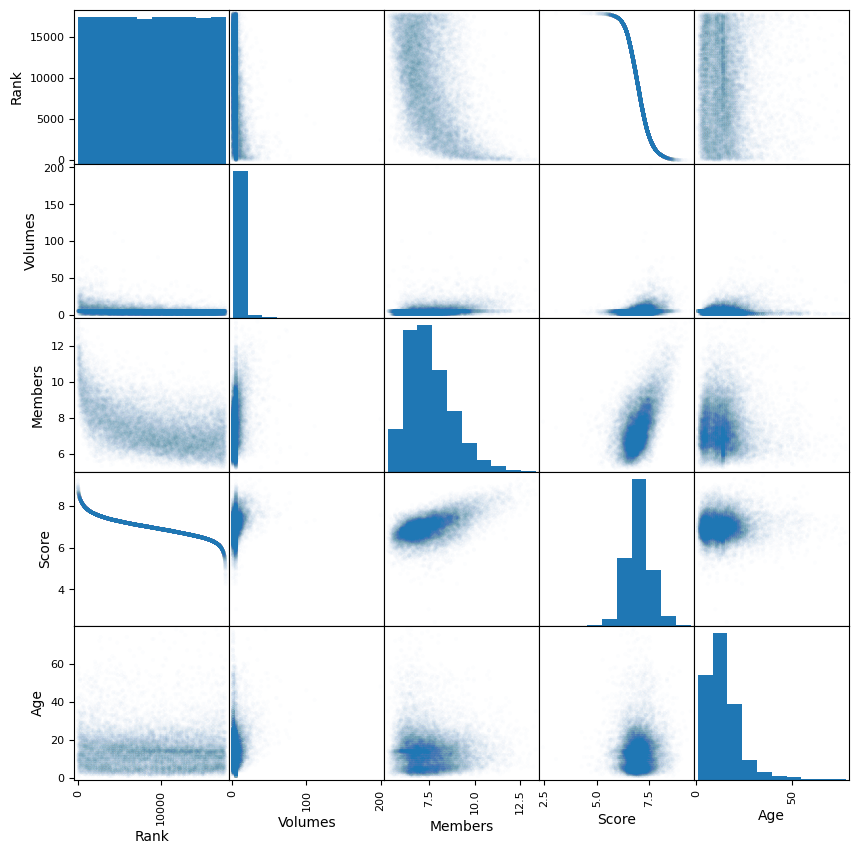

In [529]:
scatter_matrix(dataframe, alpha = .01, figsize = (10, 10))

Векторизация

In [530]:
type_column = dataframe["Type"]
tmp = type_column.str.get_dummies(sep=", ")

tmp = tmp.drop(columns=["UNKNOWN"], errors="ignore")
tmp = tmp.drop(columns=["Unknown"], errors="ignore")

tmp = tmp.add_prefix("Type_")

dataframe = pd.concat([dataframe.drop(columns=["Type"]), tmp], axis=1)

print(dataframe.columns)

Index(['Rank', 'Volumes', 'Members', 'Score', 'Age', 'Type_Doujinshi',
       'Type_Light-Novel', 'Type_Manga', 'Type_Manhua', 'Type_Manhwa',
       'Type_Novel', 'Type_One-shot'],
      dtype='object')


In [531]:
dataframe

,Rank,Volumes,Members,Score,Age,Type_Doujinshi,Type_Light-Novel,Type_Manga,Type_Manhua,Type_Manhwa,Type_Novel,Type_One-shot
0,460,35.000000,9.594990,8.16,39.0,0,0,1,0,0,0,0
1,4532,18.000000,9.448570,7.31,11.0,0,0,1,0,0,0,0
2,1808,5.066793,9.394494,7.67,16.0,0,0,1,0,0,0,0
3,17377,5.066793,6.918695,5.95,13.0,0,0,0,0,0,0,1
4,953,5.066793,8.510974,7.90,9.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17806,10635,5.066793,7.041412,6.85,4.0,0,0,1,0,0,0,0
17807,5720,2.000000,8.716700,7.21,16.0,0,0,1,0,0,0,0
17808,15889,3.000000,6.546785,6.38,7.0,0,0,1,0,0,0,0
17809,7569,5.066793,9.328834,7.07,6.0,0,0,1,0,0,0,0


Нормализация

In [532]:
dataframe_num_data = dataframe[dataframe_num]
dataframe_num_data.describe()

,Rank,Members,Score,Volumes
count,17811.000000,17811.000000,17811.000000,17811.000000
mean,8919.628937,7.518228,6.989322,5.066793
std,5153.840633,1.230540,0.548498,5.781243
min,1.000000,5.225747,2.430000,1.000000
25%,4453.500000,6.605298,6.640000,2.000000
50%,8929.000000,7.306531,6.970000,5.000000
75%,13381.500000,8.228043,7.320000,5.066793
max,17847.000000,13.365230,9.470000,200.000000


In [533]:
dataframe_num_data = (dataframe_num_data - dataframe_num_data.mean(axis = 0))/dataframe_num_data.std(axis = 0)
dataframe_num_data.describe()

,Rank,Members,Score,Volumes
count,1.781100e+04,1.781100e+04,1.781100e+04,1.781100e+04
mean,2.872330e-17,2.122333e-16,2.832437e-16,9.414861e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.730482e+00,-1.862988e+00,-8.312380e+00,-7.034461e-01
25%,-8.665633e-01,-7.418938e-01,-6.368700e-01,-5.304730e-01
50%,1.818268e-03,-1.720354e-01,-3.522670e-02,-1.155345e-02
75%,8.657371e-01,5.768327e-01,6.028798e-01,1.536310e-16
max,1.732178e+00,4.751574e+00,4.522677e+00,3.371821e+01


In [534]:
dataframe_num_data

,Rank,Members,Score,Volumes
0,-1.641422,1.687684,2.134335,5.177642e+00
1,-0.851332,1.568695,0.584648,2.237098e+00
2,-1.379870,1.524750,1.240986,1.536310e-16
3,1.640984,-0.487211,-1.894851,1.536310e-16
4,-1.545765,0.806757,1.660313,1.536310e-16
...,...,...,...,...
17806,0.332834,-0.387485,-0.254006,1.536310e-16
17807,-0.620824,0.973940,0.402332,-5.304730e-01
17808,1.352267,-0.789444,-1.110892,-3.574998e-01
17809,-0.262063,1.471392,0.147089,1.536310e-16


In [535]:
dataframe = pd.concat([dataframe.drop(columns=dataframe_num), dataframe_num_data], axis=1)
dataframe

,Age,Type_Doujinshi,Type_Light-Novel,Type_Manga,Type_Manhua,Type_Manhwa,Type_Novel,Type_One-shot,Rank,Members,Score,Volumes
0,39.0,0,0,1,0,0,0,0,-1.641422,1.687684,2.134335,5.177642e+00
1,11.0,0,0,1,0,0,0,0,-0.851332,1.568695,0.584648,2.237098e+00
2,16.0,0,0,1,0,0,0,0,-1.379870,1.524750,1.240986,1.536310e-16
3,13.0,0,0,0,0,0,0,1,1.640984,-0.487211,-1.894851,1.536310e-16
4,9.0,0,0,0,0,1,0,0,-1.545765,0.806757,1.660313,1.536310e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
17806,4.0,0,0,1,0,0,0,0,0.332834,-0.387485,-0.254006,1.536310e-16
17807,16.0,0,0,1,0,0,0,0,-0.620824,0.973940,0.402332,-5.304730e-01
17808,7.0,0,0,1,0,0,0,0,1.352267,-0.789444,-1.110892,-3.574998e-01
17809,6.0,0,0,1,0,0,0,0,-0.262063,1.471392,0.147089,1.536310e-16


Разделение данных на тестовую и обучающую выборки

In [536]:
X = dataframe.drop(columns=all_types)
y = dataframe[all_types].to_numpy()
feature_names = X.columns
X = X.to_numpy()
N, d = X.shape

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [538]:
dataframe

,Age,Type_Doujinshi,Type_Light-Novel,Type_Manga,Type_Manhua,Type_Manhwa,Type_Novel,Type_One-shot,Rank,Members,Score,Volumes
0,39.0,0,0,1,0,0,0,0,-1.641422,1.687684,2.134335,5.177642e+00
1,11.0,0,0,1,0,0,0,0,-0.851332,1.568695,0.584648,2.237098e+00
2,16.0,0,0,1,0,0,0,0,-1.379870,1.524750,1.240986,1.536310e-16
3,13.0,0,0,0,0,0,0,1,1.640984,-0.487211,-1.894851,1.536310e-16
4,9.0,0,0,0,0,1,0,0,-1.545765,0.806757,1.660313,1.536310e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
17806,4.0,0,0,1,0,0,0,0,0.332834,-0.387485,-0.254006,1.536310e-16
17807,16.0,0,0,1,0,0,0,0,-0.620824,0.973940,0.402332,-5.304730e-01
17808,7.0,0,0,1,0,0,0,0,1.352267,-0.789444,-1.110892,-3.574998e-01
17809,6.0,0,0,1,0,0,0,0,-0.262063,1.471392,0.147089,1.536310e-16


In [539]:
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

10686 7125


Random Forest Classifier

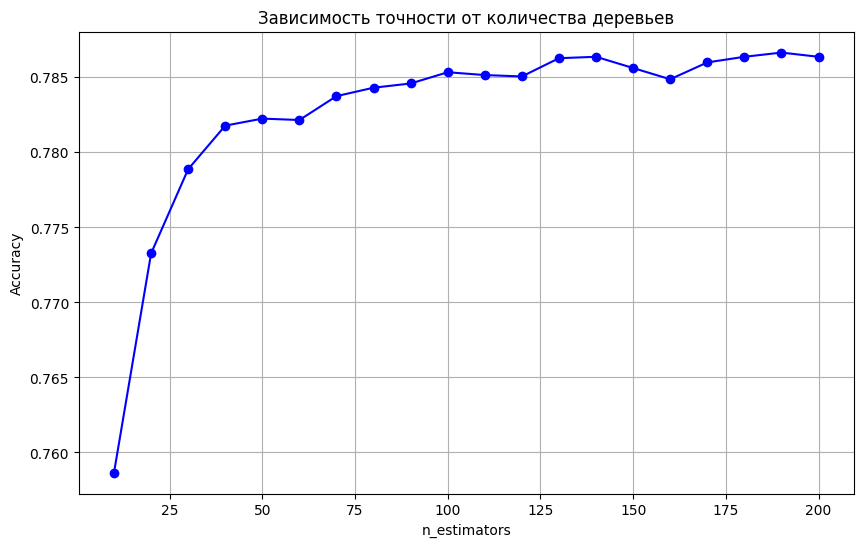

Оптимальное количество деревьев: 190
RFC: Ошибка на обучающей выборке:  0.0
RFC: Ошибка на тестовой выборке:  0.04904260651629073


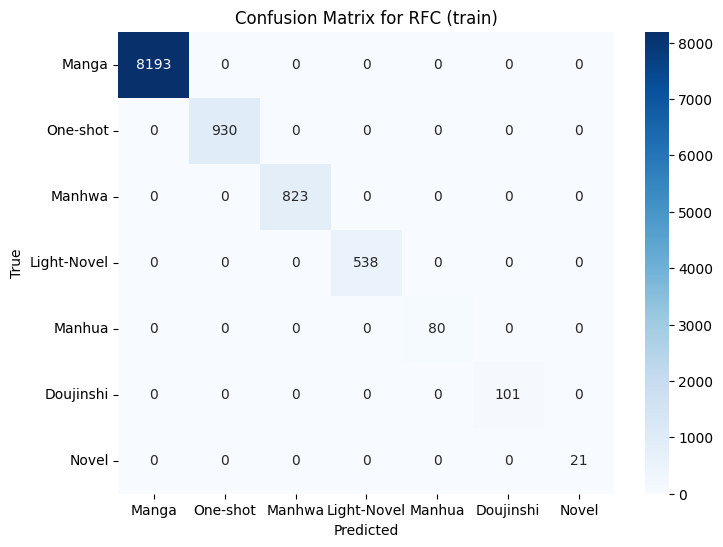

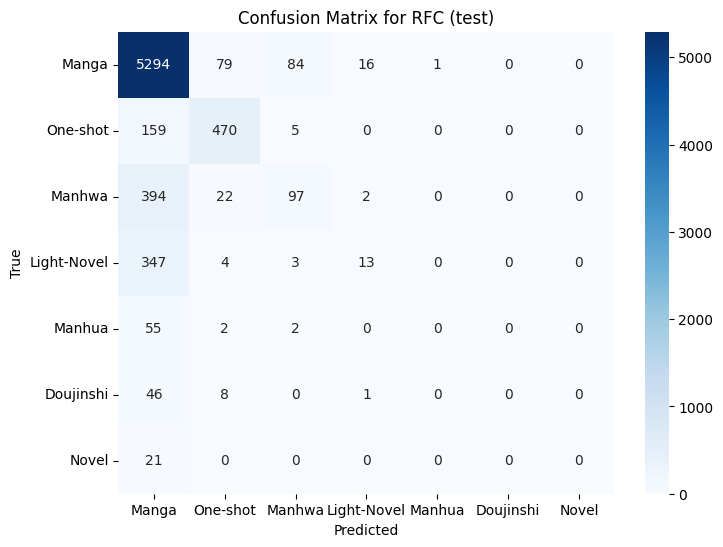

Confusion Matrix for RFC (Text Representation):
[[5294   79   84   16    1    0    0]
 [ 159  470    5    0    0    0    0]
 [ 394   22   97    2    0    0    0]
 [ 347    4    3   13    0    0    0]
 [  55    2    2    0    0    0    0]
 [  46    8    0    1    0    0    0]
 [  21    0    0    0    0    0    0]]
Classification Report for RFC:
              precision    recall  f1-score   support

       Manga       0.87      0.94      0.90      5474
    One-shot       0.80      0.74      0.77       634
      Manhwa       0.51      0.19      0.27       515
 Light-Novel       0.41      0.04      0.07       367
      Manhua       0.00      0.00      0.00        59
   Doujinshi       0.00      0.00      0.00        55
       Novel       0.00      0.00      0.00        21

   micro avg       0.85      0.80      0.82      7125
   macro avg       0.37      0.27      0.29      7125
weighted avg       0.79      0.80      0.78      7125
 samples avg       0.80      0.80      0.80      7125



C:\Users\Илья\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Илья\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

n_estimators_range = range(10, 201, 10)
cv_scores = []

# Перебор значений n_estimators
for n in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')  # 5-кратная кросс-валидация
    cv_scores.append(scores.mean())

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности от количества деревьев')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Выбор оптимального значения
optimal_n = n_estimators_range[np.argmax(cv_scores)]
print(f"Оптимальное количество деревьев: {optimal_n}")

rf = ensemble.RandomForestClassifier(n_estimators = optimal_n, class_weight='balanced')
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

err_train_rf = np.mean(y_train != y_train_pred_rf)
err_test_rf  = np.mean(y_test  != y_test_pred_rf)

print("RFC: Ошибка на обучающей выборке: ", err_train_rf)
print("RFC: Ошибка на тестовой выборке: ", err_test_rf)

class_names = ["Manga", "One-shot", "Manhwa", "Light-Novel", "Manhua", "Doujinshi", "Novel"]

# Визуализация матриц ошибок
y_train_multiclass = np.argmax(y_train, axis=1)
y_train_pred_rf_multiclass = np.argmax(y_train_pred_rf, axis=1)
cm = confusion_matrix(y_train_multiclass, y_train_pred_rf_multiclass)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for RFC (train)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_test_multiclass = np.argmax(y_test, axis=1)
y_test_pred_rf_multiclass = np.argmax(y_test_pred_rf, axis=1)
cm = confusion_matrix(y_test_multiclass, y_test_pred_rf_multiclass)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for RFC (test)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Confusion Matrix for RFC (Text Representation):")
print(cm)

print("Classification Report for RFC:")
print(classification_report(y_test, y_test_pred_rf, target_names=class_names))

In [541]:
np.sum(rf.feature_importances_)

1.0000000000000002

Анализ важности признаков в RFC

In [542]:
importances = rf.feature_importances_
sums = {}
indexes_to_delete = []

for f in range(d):
    tmp = feature_names[f].find('_')
    if not feature_names[f][:tmp] in dataframe_str:
        continue
    tmp = feature_names[f][:tmp]
    if (not tmp in sums.keys()):
        sums[tmp] = 0
    sums[tmp] += importances[f]
    indexes_to_delete.append(f)

importances = list(np.delete(importances, indexes_to_delete))
feature_names = list(np.delete(feature_names, indexes_to_delete))

importances.extend(sums.values())
feature_names.extend(sums.keys())

importances = np.array(importances, dtype=np.float64)
feature_names = np.array(feature_names)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(feature_names)):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature ' Rank' (0.255652)
 2. feature 'Members' (0.208190)
 3. feature '  Age' (0.188272)
 4. feature 'Score' (0.174200)
 5. feature 'Volumes' (0.173686)


(-1.0, 5.0)

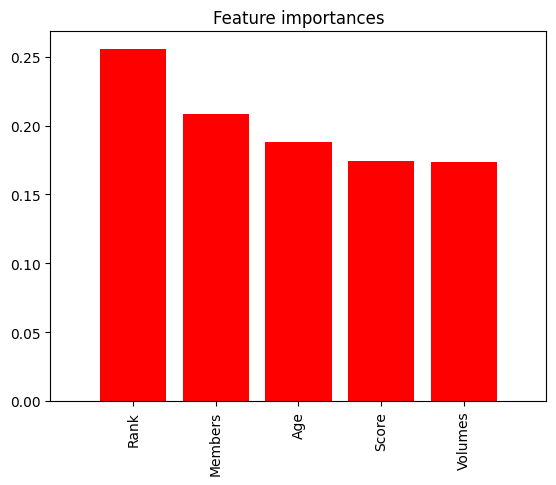

In [543]:
d_first = min(len(feature_names), 20)
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

KNN

Распределение классов до балансировки:
Manga          8193
One-shot        930
Manhwa          823
Light-Novel     538
Manhua           80
Doujinshi       101
Novel            21
dtype: int64
Распределение классов после балансировки:
Manga          2000
One-shot       1100
Manhwa          930
Light-Novel     600
Manhua          200
Doujinshi       150
Novel           100
dtype: int64


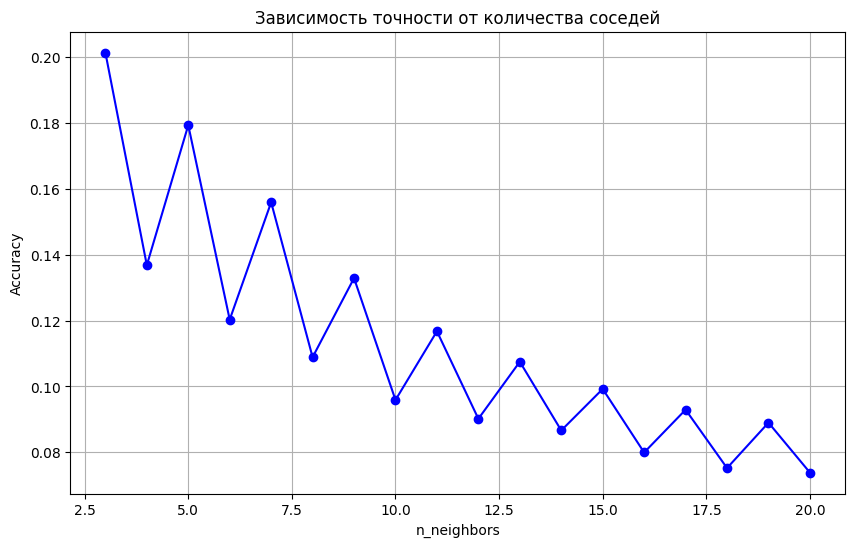

Оптимальное количество соседей: 3
KNN: Ошибка на обучающей выборке:  0.057902137232845895
KNN: Ошибка на тестовой выборке:  0.11037593984962406


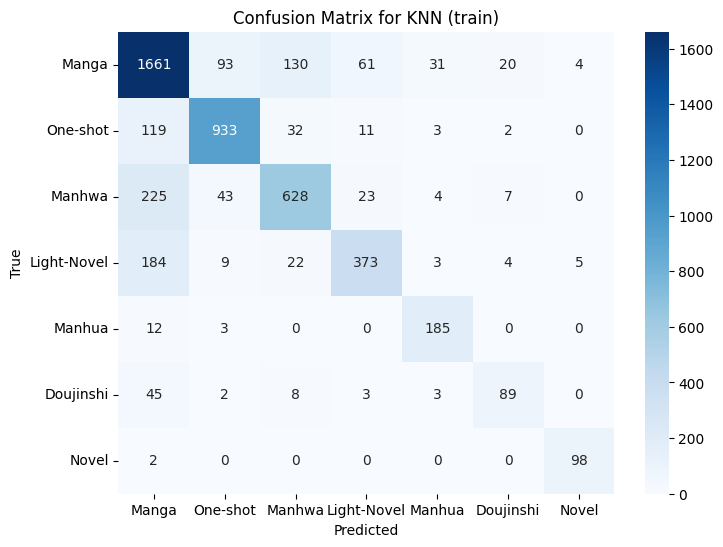

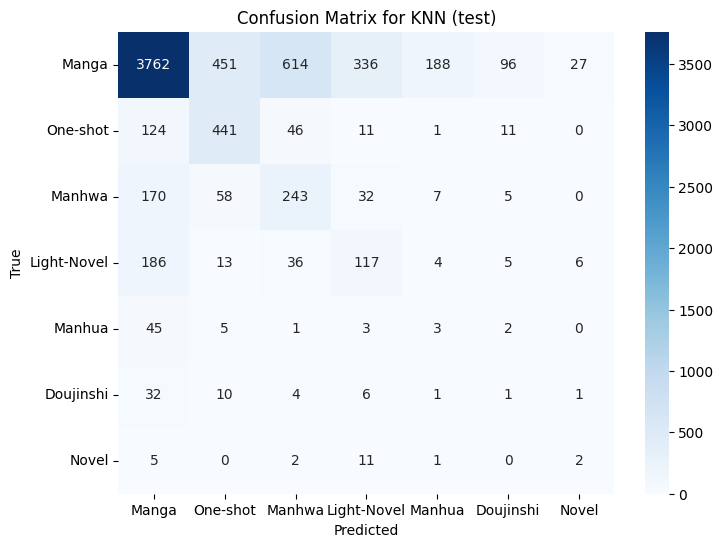

Confusion Matrix for KNN (Text Representation):
[[3762  451  614  336  188   96   27]
 [ 124  441   46   11    1   11    0]
 [ 170   58  243   32    7    5    0]
 [ 186   13   36  117    4    5    6]
 [  45    5    1    3    3    2    0]
 [  32   10    4    6    1    1    1]
 [   5    0    2   11    1    0    2]]
Classification Report for KNN:
              precision    recall  f1-score   support

       Manga       0.90      0.58      0.70      5474
    One-shot       0.45      0.70      0.55       634
      Manhwa       0.26      0.47      0.33       515
 Light-Novel       0.23      0.32      0.27       367
      Manhua       0.01      0.05      0.02        59
   Doujinshi       0.01      0.02      0.01        55
       Novel       0.06      0.10      0.07        21

   micro avg       0.63      0.56      0.59      7125
   macro avg       0.27      0.32      0.28      7125
weighted avg       0.76      0.56      0.63      7125
 samples avg       0.56      0.56      0.56      7125



C:\Users\Илья\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)


y_train_df = pd.DataFrame(y_train, columns=class_names)
class_distribution = y_train_df.sum()
print("Распределение классов до балансировки:")
print(class_distribution)

#undersampler = RandomUnderSampler()
#X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)
sampling_strategy = {
    1: 1100,  # Type_One-shot
    2: 930,  # Type_Manhwa
    3: 600,  # Type_Light-Novel
    4: 200,   # Type_Doujinshi
    5: 150,   # Type_Manhua
    6: 100    # Type_Novel
}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)
undersampler = RandomUnderSampler(sampling_strategy={0: 2000}, random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train_res, y_train_res)

y_train_res_df = pd.DataFrame(y_train_res, columns=class_names)

# Подсчет количества примеров для каждого класса
class_distribution = y_train_res_df.sum()
print("Распределение классов после балансировки:")
print(class_distribution)

neighbors_range = range(3, 21)
cv_scores = []

for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности от количества соседей')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Выбор оптимального значения
optimal_n = neighbors_range[np.argmax(cv_scores)]
print(f"Оптимальное количество соседей: {optimal_n}")

knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(X_train_res, y_train_res)

y_train_pred_knn = knn.predict(X_train_res)
y_test_pred_knn = knn.predict(X_test)

err_train_knn = np.mean(y_train_res != y_train_pred_knn)
err_test_knn = np.mean(y_test != y_test_pred_knn)

print("KNN: Ошибка на обучающей выборке: ", err_train_knn)
print("KNN: Ошибка на тестовой выборке: ", err_test_knn)

class_names = ["Manga", "One-shot", "Manhwa", "Light-Novel", "Manhua", "Doujinshi", "Novel"]

# Визуализация матриц ошибок
y_train_multiclass = np.argmax(y_train_res, axis=1)
y_train_pred_knn_multiclass = np.argmax(y_train_pred_knn, axis=1)
cm = confusion_matrix(y_train_multiclass, y_train_pred_knn_multiclass)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for KNN (train)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_test_multiclass = np.argmax(y_test, axis=1)
y_test_pred_knn_multiclass = np.argmax(y_test_pred_knn, axis=1)
cm = confusion_matrix(y_test_multiclass, y_test_pred_knn_multiclass)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for KNN (test)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Confusion Matrix for KNN (Text Representation):")
print(cm)

print("Classification Report for KNN:")
print(classification_report(y_test, y_test_pred_knn, target_names=class_names))

Сравнение

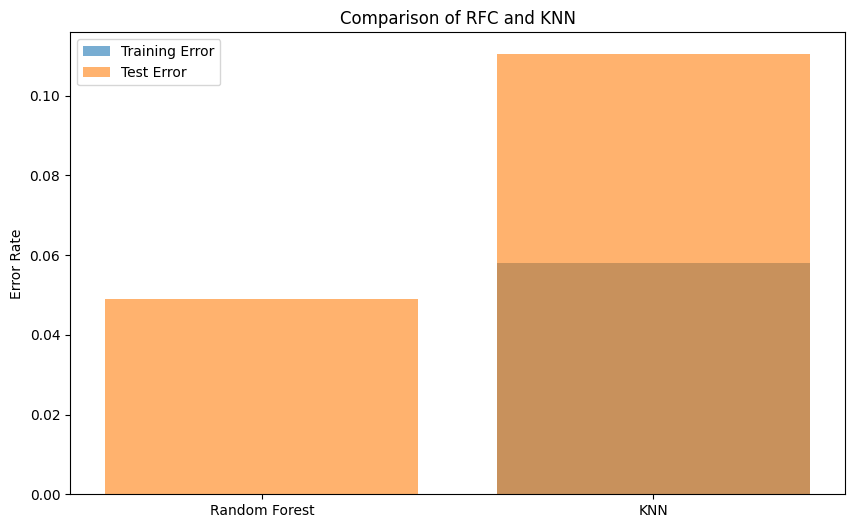

In [545]:
models = ['Random Forest', 'KNN']
train_errors = [err_train_rf, err_train_knn]
test_errors = [err_test_rf, err_test_knn]

plt.figure(figsize=(10, 6))
plt.bar(models, train_errors, alpha=0.6, label='Training Error')
plt.bar(models, test_errors, alpha=0.6, label='Test Error')
plt.ylabel('Error Rate')
plt.title('Comparison of RFC and KNN')
plt.legend()
plt.show()


Вывод

Использование алгоритмов машинного обучения, таких как Random Forest и k-Nearest Neighbors, позволяет эффективно классифицировать мангу по типам. Однако выбор модели зависит от конкретных требований задачи:

KNN демонстрирует более сбалансированные результаты для всех классов и меньше склонна к переобучению, что делает её подходящей для задач, где важно учитывать редкие классы.

RFC показывает высокую точность на основных классах, но требует дополнительной настройки для улучшения работы с редкими классами и снижения переобучения.

В целом, для построения системы рекомендаций манги можно начать с kNN, а затем, при необходимости, перейти к более сложным моделям, таким как RFC, после их тщательной настройки и оптимизации.

Задача кластеризации

Задача кластеризации — это одна из задач обучения без учителя (unsupervised learning) в машинном обучении. Основная цель кластеризации — разбить набор данных на группы (кластеры), так чтобы объекты внутри одного кластера были более похожи друг на друга, чем на объекты из других кластеров. Это позволяет выявить скрытые структуры в данных, которые могут быть полезны для дальнейшего анализа.

In [546]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_eps(X, min_samples=5, plot=True):
    # Вычисляем расстояния до k-го соседа
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X)
    distances, _ = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, -1], axis=0)

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(distances)
        plt.title('k-distance graph')
        plt.xlabel('Points')
        plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
        plt.show()

    eps = distances[np.argmax(np.diff(distances))]
    return eps

def find_optimal_min_samples(X, eps, max_samples=20):
    from sklearn.cluster import DBSCAN

    silhouette_scores = []
    for min_samples in range(2, max_samples + 1):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        if len(np.unique(labels)) > 1:
            from sklearn.metrics import silhouette_score
            score = silhouette_score(X, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)

    optimal_min_samples = np.argmax(silhouette_scores) + 2
    return optimal_min_samples

In [547]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

def find_optimal_bandwidth(X, quantile_range=(0.1, 0.5, 0.01), plot=True):
    quantiles = np.arange(*quantile_range)
    silhouette_scores = []

    for q in quantiles:
        bandwidth = estimate_bandwidth(X, quantile=q)
        meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        labels = meanshift.fit_predict(X)
        
        # Игнорируем случаи, когда все точки принадлежат одному кластеру
        if len(np.unique(labels)) > 1:
            score = silhouette_score(X, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(quantiles, silhouette_scores, marker='o')
        plt.title('Silhouette Score vs Quantile')
        plt.xlabel('Quantile')
        plt.ylabel('Silhouette Score')
        plt.show()

    optimal_quantile = quantiles[np.argmax(silhouette_scores)]
    optimal_bandwidth = estimate_bandwidth(X, quantile=optimal_quantile)
    return optimal_bandwidth

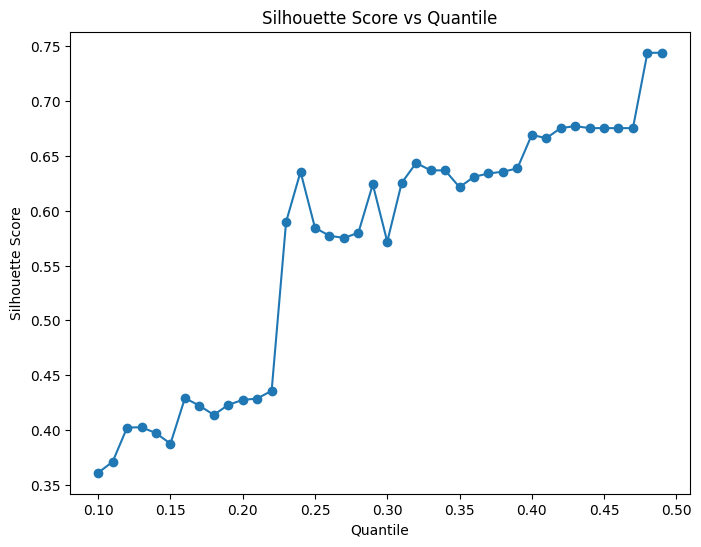

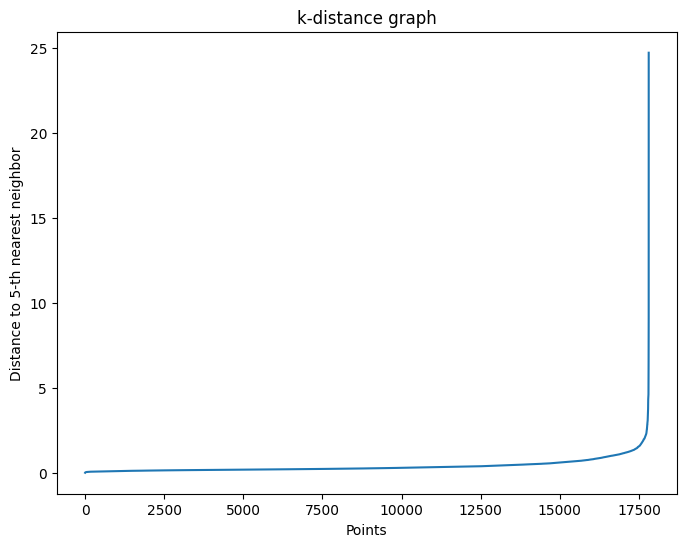

Сравнение кластеризации и классификации:
      Method  V-measure  Adjusted Rand Index  Adjusted Mutual Info
0        RFC   0.274030             0.374882              0.272460
1        kNN   0.130642             0.197048              0.128483
2     KMeans   0.030960            -0.009273              0.030192
3     DBSCAN   0.042108             0.001765              0.026638
4  MeanShift   0.006470            -0.021355              0.006090


C:\Users\Илья\AppData\Local\Temp\ipykernel_10208\594577118.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="V-measure", data=comparison_df, palette="viridis")
C:\Users\Илья\AppData\Local\Temp\ipykernel_10208\594577118.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Adjusted Rand Index", data=comparison_df, palette="viridis")
C:\Users\Илья\AppData\Local\Temp\ipykernel_10208\594577118.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y="Adjusted Mutual Info", data=comparison_df, palette=

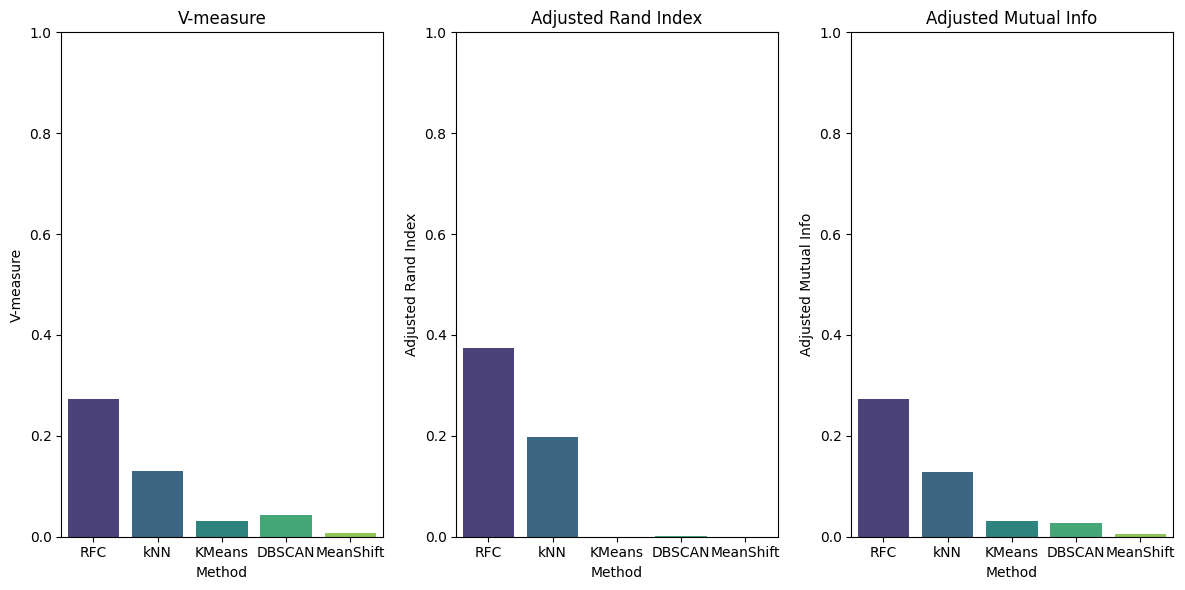

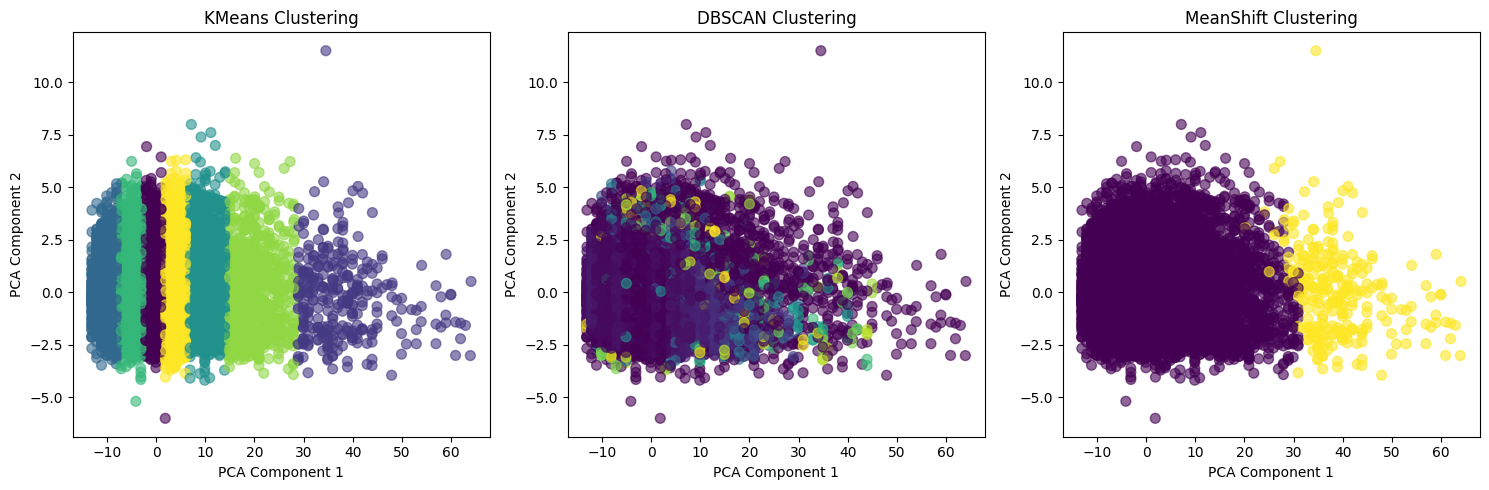

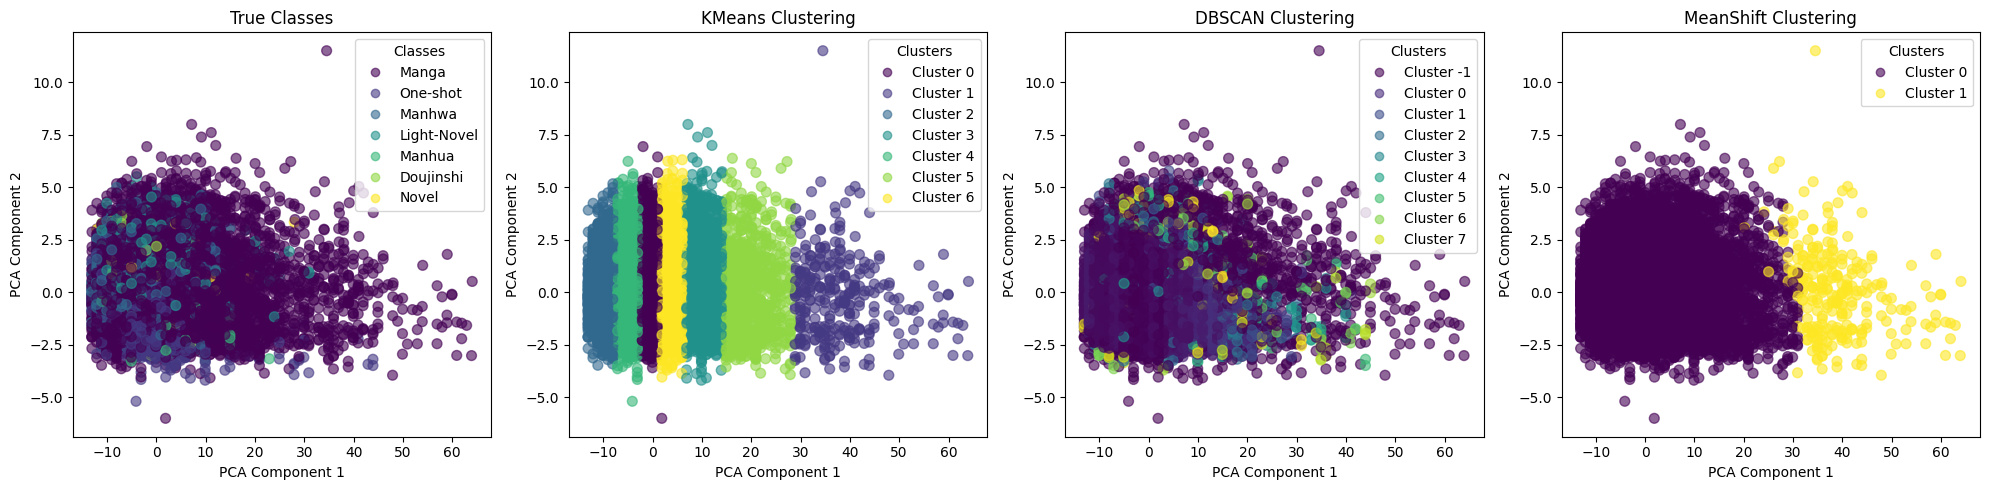

In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import (
    v_measure_score, 
    adjusted_rand_score, 
    mutual_info_score, 
    normalized_mutual_info_score, 
    adjusted_mutual_info_score
)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Подготовка данных
X_clustering = dataframe.drop(columns=all_types).to_numpy()
y_clustering = y
N_clustering, d_clustering = X_clustering.shape

y_clustering_num = np.argmax(y_clustering, axis=1)

bandwidth = find_optimal_bandwidth(X_clustering, quantile_range=(0.1, 0.5, 0.01), plot=True)

eps = find_optimal_eps(X_clustering, min_samples=5, plot=True)

min_samples = find_optimal_min_samples(X_clustering, eps, max_samples=20)

# Инициализация алгоритмов кластеризации
kmeans = KMeans(n_clusters=len(np.unique(y_clustering_num)), random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)

algs = (
    ("KMeans", kmeans),
    ("DBSCAN", dbscan),
    ("MeanShift", meanshift),
)

# Оценка качества кластеризации
metrics_res = []
cluster_labels = {}  # Словарь для хранения меток кластеров

for alg_name, alg in algs:
    alg_labels = alg.fit_predict(X_clustering)
    cluster_labels[alg_name] = alg_labels  # Сохраняем метки кластеров
    
    all_metrics = (
        ("V-measure", v_measure_score),
        ("Adjusted Rand Index", adjusted_rand_score),
        ("Mutual Info", mutual_info_score),
        ("Normalized Mutual Info", normalized_mutual_info_score),
        ("Adjusted Mutual Info", adjusted_mutual_info_score),
    )
    
    for metric_name, metric in all_metrics:
        score = metric(y_clustering_num, alg_labels)
        metrics_res.append((alg_name, metric_name, score))

# Результаты классификации
y_test_multiclass = np.argmax(y_test, axis=1)
y_test_pred_rf_multiclass = np.argmax(y_test_pred_rf, axis=1)
y_test_pred_knn_multiclass = np.argmax(y_test_pred_knn, axis=1)

# Метрики для классификации
rf_v_measure = v_measure_score(y_test_multiclass, y_test_pred_rf_multiclass)
rf_ari = adjusted_rand_score(y_test_multiclass, y_test_pred_rf_multiclass)
rf_ami = adjusted_mutual_info_score(y_test_multiclass, y_test_pred_rf_multiclass)

knn_v_measure = v_measure_score(y_test_multiclass, y_test_pred_knn_multiclass)
knn_ari = adjusted_rand_score(y_test_multiclass, y_test_pred_knn_multiclass)
knn_ami = adjusted_mutual_info_score(y_test_multiclass, y_test_pred_knn_multiclass)

# Метрики для кластеризации
kmeans_v_measure = v_measure_score(y_clustering_num, cluster_labels["KMeans"])
kmeans_ari = adjusted_rand_score(y_clustering_num, cluster_labels["KMeans"])
kmeans_ami = adjusted_mutual_info_score(y_clustering_num, cluster_labels["KMeans"])

dbscan_v_measure = v_measure_score(y_clustering_num, cluster_labels["DBSCAN"])
dbscan_ari = adjusted_rand_score(y_clustering_num, cluster_labels["DBSCAN"])
dbscan_ami = adjusted_mutual_info_score(y_clustering_num, cluster_labels["DBSCAN"])

meanshift_v_measure = v_measure_score(y_clustering_num, cluster_labels["MeanShift"])
meanshift_ari = adjusted_rand_score(y_clustering_num, cluster_labels["MeanShift"])
meanshift_ami = adjusted_mutual_info_score(y_clustering_num, cluster_labels["MeanShift"])

# Создаем таблицу для сравнения
comparison_df = pd.DataFrame({
    "Method": ["RFC", "kNN", "KMeans", "DBSCAN", "MeanShift"],
    "V-measure": [rf_v_measure, knn_v_measure, kmeans_v_measure, dbscan_v_measure, meanshift_v_measure],
    "Adjusted Rand Index": [rf_ari, knn_ari, kmeans_ari, dbscan_ari, meanshift_ari],
    "Adjusted Mutual Info": [rf_ami, knn_ami, kmeans_ami, dbscan_ami, meanshift_ami]
})

print("Сравнение кластеризации и классификации:")
print(comparison_df)

# Визуализация результатов
plt.figure(figsize=(12, 6))

# График для V-measure
plt.subplot(1, 3, 1)
sns.barplot(x="Method", y="V-measure", data=comparison_df, palette="viridis")
plt.title("V-measure")
plt.ylim(0, 1)

# График для Adjusted Rand Index
plt.subplot(1, 3, 2)
sns.barplot(x="Method", y="Adjusted Rand Index", data=comparison_df, palette="viridis")
plt.title("Adjusted Rand Index")
plt.ylim(0, 1)

# График для Adjusted Mutual Info
plt.subplot(1, 3, 3)
sns.barplot(x="Method", y="Adjusted Mutual Info", data=comparison_df, palette="viridis")
plt.title("Adjusted Mutual Info")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Визуализация кластеров (с использованием PCA для уменьшения размерности)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

plt.figure(figsize=(15, 5))
for i, (alg_name, _) in enumerate(algs):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels[alg_name], cmap='viridis', s=50, alpha=0.6)
    plt.title(f"{alg_name} Clustering")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()




# Визуализация истинных классов и кластеров
plt.figure(figsize=(20, 5))

# Истинные классы
plt.subplot(1, 4, 1)
scatter_true = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clustering_num, cmap='viridis', s=50, alpha=0.6)
plt.title("True Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(handles=scatter_true.legend_elements()[0], labels=class_names, title="Classes")

# Кластеризация KMeans
plt.subplot(1, 4, 2)
scatter_kmeans = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels["KMeans"], cmap='viridis', s=50, alpha=0.6)
plt.title("KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
legend_labels_kmeans = [f"Cluster {i}" for i in np.unique(cluster_labels["KMeans"])]
plt.legend(handles=scatter_kmeans.legend_elements()[0], labels=legend_labels_kmeans, title="Clusters")

# Кластеризация DBSCAN
plt.subplot(1, 4, 3)
scatter_dbscan = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels["DBSCAN"], cmap='viridis', s=50, alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
legend_labels_dbscan = [f"Cluster {i}" for i in np.unique(cluster_labels["DBSCAN"])]
plt.legend(handles=scatter_dbscan.legend_elements()[0], labels=legend_labels_dbscan, title="Clusters")

# Кластеризация MeanShift
plt.subplot(1, 4, 4)
scatter_meanshift = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels["MeanShift"], cmap='viridis', s=50, alpha=0.6)
plt.title("MeanShift Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
legend_labels_meanshift = [f"Cluster {i}" for i in np.unique(cluster_labels["MeanShift"])]
plt.legend(handles=scatter_meanshift.legend_elements()[0], labels=legend_labels_meanshift, title="Clusters")

plt.tight_layout()
plt.show()

Исходя из полученных результатов можно заключить, что методы кластеризации (обучение без учителя) не подходят для данной задачи, так как они не смогли выявить структуры в данных, соответствующие истинным меткам классов. Все примененные алгоритмы кластеризации показали низкие результаты по ключевым метрикам, таким как Adjusted Rand Index и V-Measure. Поэтому для получения более точных результатов рекомендуется использовать методы обучения с учителем, такие как Random Forest или KNN, которые продемонстрировали более высокую эффективность в данной задаче.